In [1]:
import yaml
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from query import QueryExecutor

2018-05-05 20:47:39,614 : INFO : 'pattern' package not found; tag filters are not available for English


In [2]:
config = yaml.safe_load(open('../config.yml'))
models_dir = config['models_dir']
mongo_connection = config['mongo_connection']
query_executor = QueryExecutor(mongo_connection, models_dir)


2018-05-05 20:47:40,723 : INFO : loading Phraser object from /media/diego/QData/bankdomain/model//bigrams_phraser
2018-05-05 20:47:40,729 : INFO : loaded /media/diego/QData/bankdomain/model//bigrams_phraser
2018-05-05 20:47:40,730 : INFO : loading Phraser object from /media/diego/QData/bankdomain/model//trigrams_phraser
2018-05-05 20:47:40,733 : INFO : loaded /media/diego/QData/bankdomain/model//trigrams_phraser
2018-05-05 20:47:40,733 : INFO : loading Doc2Vec object from /media/diego/QData/bankdomain/model//doc2vec
2018-05-05 20:47:41,015 : INFO : loading vocabulary recursively from /media/diego/QData/bankdomain/model//doc2vec.vocabulary.* with mmap=None
2018-05-05 20:47:41,016 : INFO : loading trainables recursively from /media/diego/QData/bankdomain/model//doc2vec.trainables.* with mmap=None
2018-05-05 20:47:41,017 : INFO : loading wv recursively from /media/diego/QData/bankdomain/model//doc2vec.wv.* with mmap=None
2018-05-05 20:47:41,017 : INFO : loading docvecs recursively from /m

In [3]:
model = query_executor.model_facade.doc2vecFacade.model

In [4]:
query_executor.process_input('Was ist ein P-Konto?')

2018-05-05 20:47:41,499 : INFO : Split to ['p-konto']
2018-05-05 20:47:41,501 : INFO : precomputing L2-norms of doc weight vectors


Welche Personen können die selbstschuldnerische Bürgschaft übernehmen?

======1372============================
Welche Personen können die selbstschuldnerische Bürgschaft übernehmen?

Was ist ein Notaranderkonto?
ein auf den namen eines notars eingerichtetes bankkonto zur vorübergehenden treuhänderischen verwahrung von fremdgeldern. das notaranderkonto ermöglicht die vorzeitige darlehensauszahlung  ( valutierung )  zur kaufpreisabwicklung, solange die grundschuld noch nicht bzw. nicht ranggerecht eingetragen ist.

======7945============================
Was ist ein Notaranderkonto?
ein auf den namen eines notars eingerichtetes bankkonto zur vorübergehenden treuhänderischen verwahrung von fremdgeldern. das notaranderkonto ermöglicht die vorzeitige darlehensauszahlung  ( valutierung )  zur kaufpreisabwicklung, solange die grundschuld noch nicht bzw. nicht ranggerecht eingetragen ist.

Wer formuliert die Allgemeinen Bankbedingungen?
die allgemeinen bankbedingungen sind im november 2009 im e

model.__dict__

In [5]:
model.most_similar('3d-secure',topn=20)

/home/diego/anaconda3/envs/bankdomain/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-05-05 20:47:41,651 : INFO : precomputing L2-norms of word weight vectors


[('mastercard_securecode', 0.967772901058197),
 ('internethändler', 0.9630835056304932),
 ('verified_by_visa_mastercard', 0.9611273407936096),
 ('verified_by_visa', 0.9608621001243591),
 ('weiß', 0.9511807560920715),
 ('3d_secure', 0.9499682784080505),
 ('secure_code', 0.9497965574264526),
 ('®_securecode_™', 0.9493863582611084),
 ('online-händler', 0.9483455419540405),
 ('online-einkauf', 0.9455820918083191),
 ('mastercard_®_securecodetm', 0.9378215074539185),
 ('online-händlern', 0.9309759736061096),
 ('einkaufen', 0.9301160573959351),
 ('verified_by', 0.9277358651161194),
 ('sofort_registrierung', 0.9271674156188965),
 ('3d_secure_verfahren', 0.9257197976112366),
 ('teilnehmen', 0.9253029227256775),
 ('einkauf_internet', 0.9236084818840027),
 ('sekundenschnelle', 0.921766996383667),
 ('teilnehmend_händler', 0.9213133454322815)]

In [6]:
model.most_similar('überweisung',topn=20)

/home/diego/anaconda3/envs/bankdomain/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('inlandsüberweisung', 0.8539202213287354),
 ('ausfahren', 0.851787269115448),
 ('empfänger', 0.8317188024520874),
 ('sepa-überweisung', 0.8171078562736511),
 ('terminauftrag', 0.8155149817466736),
 ('tätig', 0.8121588826179504),
 ('telegrafische', 0.7950705289840698),
 ('euro-überweisung', 0.7925742864608765),
 ('eilauftrag', 0.7879289984703064),
 ('buchen', 0.7837452292442322),
 ('lastschrift', 0.7798340320587158),
 ('eilüberweisungen', 0.7783523201942444),
 ('auftragsliste', 0.772936224937439),
 ('barabhebungen', 0.7696056365966797),
 ('auslandsüberweisung', 0.7693893909454346),
 ('zahlungsauftrag', 0.7668820023536682),
 ('überweisungsauftrag', 0.7630856037139893),
 ('stornieren', 0.754763662815094),
 ('dauerauftrag', 0.7515382170677185),
 ('dienstag', 0.7493557333946228)]

In [7]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

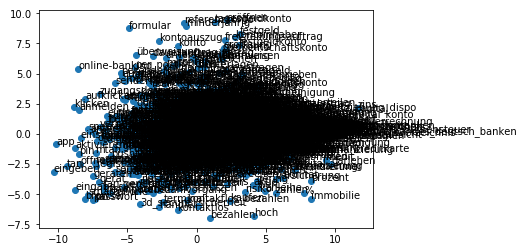

In [8]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [10]:

print (X)
 

[[ 1.1610776e+00  3.8494107e-01 -2.2945973e-01 ...  3.4545693e-01
  -1.1546343e-01 -1.5587783e+00]
 [ 6.1825228e-01  5.2867126e-01 -1.7953686e-01 ...  3.2121003e-01
   1.1444560e+00  6.0652423e-01]
 [ 8.8514730e-02  3.0907205e-01 -1.7285158e-01 ...  6.7953962e-01
   8.4420121e-01  4.3025844e-02]
 ...
 [-2.3529653e-02 -6.9778100e-02 -3.4235124e-02 ...  1.7218743e-02
   4.4741146e-02  4.7876451e-02]
 [ 4.4274516e-02 -2.9749950e-02 -2.3783451e-02 ...  6.9463965e-03
  -2.7679547e-03 -4.6466847e-04]
 [ 5.9799615e-02 -5.9795782e-02 -5.0343167e-02 ...  2.3434440e-02
   6.5290518e-02  4.4366900e-02]]


In [11]:
X.shape

(7305, 300)

In [25]:

from sklearn import cluster
from sklearn import metrics

In [26]:
NUM_CLUSTERS=150

In [27]:

 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [28]:
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[ 73 134 147 ...   1 112   1]
Centroids data
[[ 0.02968713  0.00934065 -0.03270335 ... -0.1375087  -0.00861562
  -0.02147311]
 [ 0.02367606 -0.00206798 -0.01341808 ... -0.0028434   0.02501569
   0.01744764]
 [ 0.06958999 -0.25339994 -0.20373479 ... -0.12237822  0.30026847
   0.16519661]
 ...
 [ 0.06636193  0.23171718 -0.0579115  ...  0.57291067  0.5140332
  -0.12259768]
 [ 0.07691441 -0.07537828 -0.12166265 ... -0.08471029  0.16258706
   0.08605571]
 [ 0.07084057 -0.3837721  -0.27086148 ... -0.20933476  0.7779799
   0.6600434 ]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-15000.953841626644
Silhouette_score: 
0.0400467


In [29]:
labels


array([ 73, 134, 147, ...,   1, 112,   1], dtype=int32)

In [30]:
labels.shape

(7305,)

In [31]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    print(word, labels[i])

datum 73
online-banking 134
anmelden 147
pushtan-verfahren 52
nutzen 126
neu 49
smartphone_tablet 52
kaufe 112
pushtan 52
gerät 20
z._b. 114
iphone_ipad 55
gleichzeitig 55
verwenden 52
defekt 125
stehlen_verlieren 112
empfangen 85
anzeigen 92
manchmal 21
abrufen 63
benötigen 34
registrierungsbrief 49
erhalten 37
start 102
pushtan-app 14
fragen 19
push-mitteilung 35
senden 105
qr-code 31
einlesen 132
freischaltcode 102
eingeben 136
erzeugen 3
privatkonto 41
firmenkonto 27
verwalten 115
handynummer 49
mobilfunkvertrag 132
chiptan-verfahren 52
weiterhin 119
online-banking-pin 102
direkt 63
registrierung 32
ändern 23
app_sparkasse_sparkasse 55
auftragsdaten 80
bestätigen 136
wechseln 49
passwort 79
erneut 81
komplizieren 59
vorgeben 0
passwort_pushtan-app 31
vergessen 147
häufig 122
fehleingabe 31
sperren 54
nutzung 52
app 146
installieren 61
banken 117
multibankfähigkeit 1
einrichten_pushtan-verfahren 112
sicherheitsmedium 31
einzelne 148
konto 78
chiptan 52
umstellen 102
software-produkt

beantworten 64
gesamt 39
fremdbank 59
ambibank 106
begreifen 12
wechselkurs 5
bargeldeinzahlungsautomaten 27
sogenannt 8
cash-recycler 89
teilzahlungsfunktion 119
visa-karte 97
anentgelte 27
01 148
folgemonat 148
lang 2
nächst 91
giro_direkt 94
spätestens 76
einloggen 147
aktie 53
geldkarte 21
giro 94
schufa-bonitätsauskunft 4
schufa-bonitätscheck 4
finanzstatus 102
weshalb 112
quartals-kontoauszug 1
alternative 13
not 138
provided 138
sparcard 97
versand 105
halbjahreskontoauszug 1
kontostand 18
sparcard-kontos 138
informieren 110
online-kontoauszug 1
teuer 28
münzgeld 94
einzahlen 16
kontoauszugsdrucker 89
gelten_regelung 89
produkt 65
absenders 1
möchten 94
künftig 119
pfändungsschutzkonto 41
giro_basis 94
pfändungsschutz 5
gesondert 138
entgelt 86
zulassen 132
p-konto_umwandeln 94
ambibankkonto 138
umwandlung_p-konto 89
automatisch 127
eingeräumt_kontoüberziehung_dispo 144
kontoumsatz 18
finanzassistent 55
ipad 55
ausdrucken 110
terminüberweisung 18
summe 2
vorgemerkt 138
angefragt

quicken 55
exportieren 35
sepa-fähig 27
erstmals 138
hinsichtlich 0
synchronisiert 112
login 147
auflistung 0
anordnen 59
darstellen 114
drucken 91
identifikationsverfahren 27
erst 89
technische 132
online-zugangs 1
produktbedingungen 59
aufstockung 60
tagesgeld_festgeld 94
maximale 30
didi_bank_direkt 42
s.a. 88
niederlassung_poltawien 7
u18-tagesgeldkonto 138
u18-festgeldkonto 59
u18-konto 138
volljährigkeit 25
unterliegen 67
nichtveranlagungsbescheinigung 71
kirchensteuer 66
kapitalertrag 66
steuerpflicht 7
tagegeldkonto 138
nachlass 60
kredit_umschulden 60
abschluss 128
digital_vermögensverwaltung 65
durchlaufen 1
gemeinschaftlich 65
merkmal 128
didiinvestor 82
anlagestrategie 13
risikolevel 0
zusammensetzung 1
portfolios 114
eigenständig 138
angepasst 30
anlageentscheidung 82
verantwortlich 82
mindestanlagebetrag 42
mindestanlagehorizont 59
vermögensverwaltung 60
kapital 42
vergütung 59
rechnung_stellen 30
zeitpunkt 2
einlage 5
entnahme 138
anschrift 10
berichten 27
didi_direct 13

anrufen 29
aufmerksam 112
typ 138
vorschusszins 94
online-festgeld 42
verrechnen 2
zinseszinseffekt 30
zeitlich_begrenzen 0
gedeckt_einliegen 60
selbstbehalt 82
zinsansprüche 27
gedeckt_einlage 5
rahmen_einlagensicherung 5
sicherungspflichtige 5
forderung_wertpapiergeschäft 5
anlegerentschädigung 5
entschädigen 5
staatlich_prämie 30
vertragsende 138
bekanntgeben 4
halbjährlich 0
bankdaten 35
vorgehensweise 112
übernahme 4
begünstigen 60
anweisen 138
amt 4
kärntner 4
landesregierung 4
bankomatkarte 119
geocontrol 31
deaktiviert 3
maestro-bankomatkarte 125
inland 97
erhöht 1
technologie 142
entfernung 1
geldbörse 21
kontaktlos-bezahlfunktion 1
deaktivierung 31
aktiv 55
online-sparen 94
online-sparkonto 138
name_adresse 25
office-banking 55
mbs 27
verwendung 132
größtmöglich 27
einzeln 114
verfüger 35
freigeschalten 138
journal 112
administrationsbereich 112
auftragsmaske 1
datenträger 89
importieren 1
übertragungsprotokoll 112
cardtan-generator 89
cardtan 1
secure 112
hauptkontoverbindun

getrennt 132
vordruck 25
vorliegt 138
bevollmächtigt 138
lebzeiten 138
erbe 138
erbschein 138
ausfertigung 59
amtsgericht 4
aktuell_kontostand 89
attraktiv 42
preisaushang 1
begründung 138
nachvollziehen 4
tod 39
produktangebot 138
bedingt 138
geschäftsgirokonten 1
verpflichtung 128
ao 59
abs. 39
anerkannt 4
das_heißt 39
ausweisdokument 89
zurückunterschreiben 89
preisverzeichnis_leistungsverzeichnis 30
beiliegend 138
post-ident 1
ansenden 89
zurücksenden 25
ehepartnern 1
einzelfreistellungsaufträge 138
beanspruchen 5
jahresende 148
scheidung 148
trennung 138
gemeinsam_freistellungsauftrag 148
herabsetzen 138
vorname 35
zuname 1
mögliche 59
bezeichnung 0
hotel 21
max 60
mustermann 0
genaue 60
hbci-pin 31
indizieren 1
hierzu_zählen 13
wiso 1
nähern_information 89
hbci-version 1
sepa-format 138
acrobat_reader 112
unterfinden 89
e-monatsnamel_email 25
entgegen 138
echtheit 112
ausspionieren 132
unbefugte 132
veralten 112
online-formular 89
achtung 35
maustaste 112
netzwerk 132
auftritt 11

pauschale 60
co 27
bargeldversorgung 119
tanken 1
agentur 27
ambibank-tankstellen 27
design 112
optimieren 55
attraktive 28
aushandeln 27
kaufvertrag 4
eu-verordnung 1
kapitalvermögen 59
kursgewinne 59
einkommensteuer 60
veranlagen 59
steuerfrei 0
günstig_kondition 60
filialnetz 27
verpflichtend 1
unbefristet 5
stimme 59
preisverzeichnis 138
taggenau 59
vergleichsweise 59
niedrig_zinssatz 13
plane 59
ideal 60
mitteil 1
schließlich 60
klausel 59
referenzwert 60
durchschnittlich 39
gruppe 82
zuletzt 0
kundenberater 29
bewilligung 30
zusatzversicherung 59
online-kontaktformular 1
sonstiges 89
gültig_personalausweis 112
faxen_e-monatsnamel 89
kartenorganisation 1
senden_brief 27
schonen 59
umwelt 82
abfrage 4
grob 60
fahrlässigkeit 27
ausbauen 27
hinausgehen 59
sparprodukte 138
download-center 138
sparprodukt 1
satz 0
einfahren 1
banknoten 1
vorrat 1
erkundigen 27
fachhandel 112
nachfrage 82
dürfen 60
günstige 28
spielraum 59
einspringen 60
pb 59
ratenschutz 60
wählbar 1
wunschbetrag 138
u

bemerken 112
entgegenwirken 27
benutzernamens 112
knacken 1
navigieren 1
förderkriterien 60
schalen 31
sperr-notruf 119
bausparer 60
riester-förderung 60
einkommensteuerpflichtig 138
bindungsfrist 59
steuerfreibetrag 138
angefangen 138
riskieren 59
geprüft 27
neuregistrierung 1
software-installation 132
banksparplan 59
ausnutzen 138
pfandbriefen 59
verletzen 60
engagement 27
erwähnen 60
samt 59
prozentpunkte 28
institutssicherung 27
uro 59
ersparnis 59
vorweisen 59
umgebung 112
verantwortung 1
überlassen 112
organisationsform 27
kundenzentrum 1
internet-explorer 1
lesezeichen 112
online-zugang 1
eintrage 112
photovoltaik-finanzierung 60
förderberechtigt 138
fortsetzen 1
hinterbliebene 60
standesamt 4
fortführen 59
eintippen 1
gehaltsbescheinigung 59
didibank-girokonto 1
sepa-länder 1
eu-weit 27
sepa-basislastschrift 138
dachen 60
sicherungsübereignung 59
wohn 60
effekt 59
nirgends 112
emv-standard 1
durchgehen 59
sicherheitsniveau 112
auslesbaren 112
resultieren 138
widerrechtlich 1
sp

In [33]:
all_cluster = dict()
for i, word in enumerate(words):
    if (labels[i] not in all_cluster):
        all_cluster[labels[i]] = []
    all_cluster[labels[i]].append(word)
    
for cluster in range(NUM_CLUSTERS):
    print("==============================================")
    print(cluster)
    print("==============================================")
    print(all_cluster[cluster])   

0
['vorgeben', 'transaktionsgebühr', 'gesendet', 'tradegate', 'handelszeiten', 'exchange', 'fund', 'verkaufe', 'ordern_ausführen', 'streichen', 'legen', 'größe', 'reihenfolge', 'einführung', 'aufgeben', 'neuemission', 'verlusttopf', 'transaktionskosten', 'pari', 'lieferung', 'ansehen', 'bilden', 'ausschütten', 'und_so_weiter', '$', 'zeitlich', 'begrenzung', 'kosten_anfallen', 'inlandsorder', 'trailing-stop-order', 'bruchstück', 'erlauben', 'hinsichtlich', 'auflistung', 'risikolevel', 'hauptversammlung', 'aktionär', 'anschaffungskosten', 'handelbar', 'ausgabeaufschlag', 'börslichen', 'börsenplätze', 'ordervolumen', 'stop-loss-order', 'stop-buy-order', 'titel', 'annullieren', 'unterschied_bestehen', 'effektiv_rendite', 'kupon', 'didibank_poltawien', 'platziert', 'keytrade', 'break', 'even', 'price', 'stützen', 'niw', 'investment', 'liegt', 'verzeichnis', 'instrument', 'depotgebühr', 'volatilität', 'stern', 'brüssel', 'aufforderung_nachdeckung', 'echtzeitkurse', 'dividendenzahlung', 'bruc